# Import Libraries

In [98]:
import numpy as np
from sklearn.datasets import fetch_mldata
from mnist import MNIST
import time 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#from parseData import getMnistData
#from parseData import parseData

In [66]:
def getMnistData(dataPath, trainSize=50000,validSize=10000,testSize=20000):
        
    # Load data and parse into usable numpy format
    mndata = MNIST(dataPath);
    
    train_Data = mndata.load_training()
    test_Data = mndata.load_testing()
    
    # Convert data to numpy format
    trainX = np.array(train_Data[0])
    trainY = np.array(train_Data[1])
    testX = np.array(test_Data[0])
    testY = np.array(test_Data[1])
    
    # Create data of given sizes
    validX = trainX[0:validSize];
    validY = trainY[0:validSize];
    trainX = trainX[validSize:validSize+trainSize]
    trainY = trainY[validSize:validSize+trainSize]
    testX = testX[0:testSize]
    testY = testY[0:testSize]
    
    # Normalize the data
    normalize_mean = np.mean(trainX,0)
    normalize_std  = np.std(trainX-normalize_mean,0)+0.0001
    
    trainX = np.true_divide(trainX - normalize_mean , normalize_std)
    validX = np.true_divide(validX - normalize_mean , normalize_std)
    testX =  np.true_divide(testX  - normalize_mean , normalize_std)
    
    return [trainX,trainY,validX,validY,testX,testY]

In [114]:
class_names=['Digit 0','Digit 1','Digit 2','Digit 3','Digit 4','Digit 5','Digit 6','Digit 7','Digit 8','Digit 9']

# Define Utility Functions and Parameters

In [93]:
def calculateAccuracy(prediction,ground_truth):
    n_correct = np.sum(np.equal(prediction,ground_truth))
    n_example = ground_truth.shape[0]
    print('Number of examples = ', n_example)
    print('No of correct prediction = ', n_correct)
    return( n_correct*100.0/n_example )

In [135]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    np.set_printoptions(precision=0)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.colorbar()
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Import Data

In [15]:
# Path where the data is located 
dataPath = '/home/adityav/UCSD/Spring17/COGS260_ImageRecognition/python-mnist/data/'

In [59]:
trainX,trainY,validX,validY,testX,testY = getMnistData(dataPath, 20000,1000,10000)
print("No of training Examples: \t\t", trainX.shape[0])
print("No of validation Examples: \t\t", validX.shape[0])
print("No of test Examples: \t\t\t", testX.shape[0])

No of training Examples: 		 20000
No of validation Examples: 		 1000
No of test Examples: 			 10000


# 1-Nearest Neighbor

In [142]:
from sklearn.neighbors import KNeighborsClassifier

trainX,trainY,validX,validY,testX,testY = getMnistData(dataPath, 20000,10000,10000)
knn = KNeighborsClassifier()

knn.fit(trainX,trainY) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Number of examples =  10000
No of correct prediction =  9292
KNN:
Accuracy:  92.92 %
Training Example: 20000 	 Test Example: 10000
Time taken:  1001.41 s
SVM: Linear: Accuracy: 92.92
Normalized confusion matrix


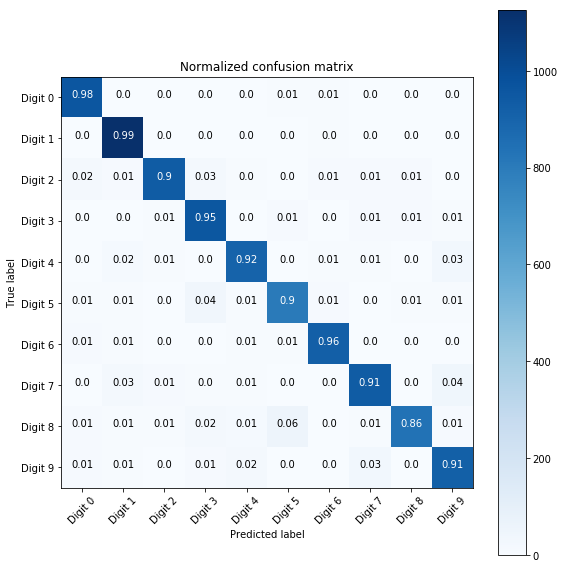

In [146]:
#%time
t1 = time.time()
predicted_class = knn.predict(testX)
t2 = time.time()

accuracy = calculateAccuracy(predicted_class,testY)
print('KNN:')
print('Accuracy: ',accuracy,'%')
print('Training Example:',n_train, '\t Test Example:', n_test)
print('Time taken: ', round(t2-t1,2),'s')      

print('SVM: Linear: Accuracy:',accuracy)

cnf_matrix = confusion_matrix(testY, predicted_class)

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

# Support Vector Machines

In [69]:
from sklearn import svm

trainX,trainY,validX,validY,testX,testY = getMnistData(dataPath, 50000,10000,20000)
lin_clf = svm.LinearSVC()

lin_clf.fit(trainX, trainY) 
svm.LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Number of examples =  20000
No of correct prediction =  18889
SVM: Linear: Accuracy: 94.445
Normalized confusion matrix


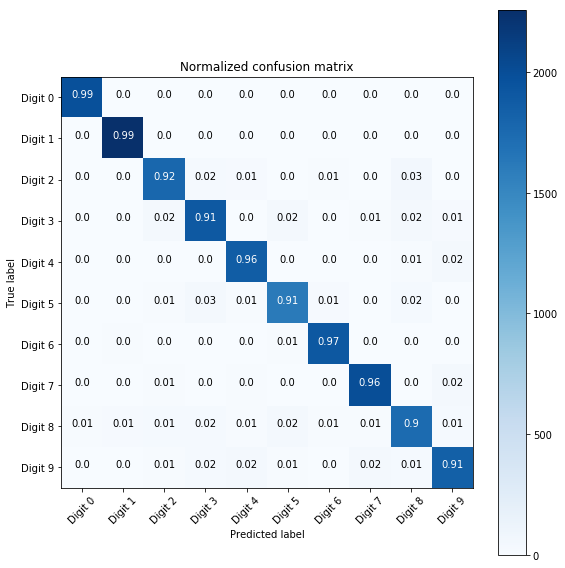

In [139]:
dec = lin_clf.decision_function(trainX)
predicted_class = np.argmax(dec,1)
accuracy = calculateAccuracy(predicted_class,trainY)

print('SVM: Linear: Accuracy:',accuracy)

cnf_matrix = confusion_matrix(trainY, predicted_class)

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

# Spatial Pyramid Matching 

# Convolutional Neural Network